(1) Perform statistical analysis., <br>
(2) Comment on or discuss the analysis results., <br>
(3) Implement a machine learning or deep learning model (regression or classification)., <br>
(4) Evaluate the model's performance., <br>
(5) Visualize the model's results., <br>
(6) Comment on and discuss the model's results., <br>
(7) Write a report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from scipy.stats import test_ind

In [2]:
df = pd.read_excel('ncaa.xlsx')
df 

,Year,Team,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,AdjO,AdjD,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16
0,2023,Alabama,37,31,6,0.838,23.19,9.65,16,2,...,115.5,88.2,72.6,0.057,11.07,110.2,99.2,10.46,1,1
1,2023,Arizona,35,28,7,0.800,19.08,8.34,14,6,...,118.2,96.3,72.0,0.027,8.32,107.5,99.2,3.12,2,0
2,2023,Arizona State,36,23,13,0.639,11.29,8.18,11,9,...,109.0,95.8,68.1,0.047,8.40,108.4,100.0,0.78,11,0
3,2023,Arkansas,36,22,14,0.611,15.99,9.87,8,10,...,112.1,94.0,69.6,-0.042,10.29,109.7,99.4,3.24,8,1
4,2023,Auburn,34,21,13,0.618,14.35,9.29,10,8,...,112.5,95.7,67.6,-0.018,9.68,109.4,99.7,3.38,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2012,Virginia Commonwealth,36,29,7,0.806,8.79,0.63,15,3,...,106.9,93.5,65.0,0.024,0.53,101.9,101.4,1.90,12,0
702,2012,West Virginia,33,19,14,0.576,12.13,7.53,9,9,...,111.4,97.9,64.0,-0.019,8.32,107.3,99.0,2.04,10,0
703,2012,Western Kentucky,35,16,19,0.457,-2.66,0.51,7,9,...,97.8,100.5,67.9,0.083,0.00,102.3,102.3,2.63,16,0
704,2012,Wichita State,33,27,6,0.818,17.42,3.80,16,2,...,116.1,93.8,65.7,-0.017,3.97,105.1,101.2,3.50,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 706 non-null    int64  
 1   Team                 706 non-null    object 
 2   G                    706 non-null    int64  
 3   W                    706 non-null    int64  
 4   L                    706 non-null    int64  
 5   W-L%                 706 non-null    float64
 6   SRS                  706 non-null    float64
 7   SOS                  706 non-null    float64
 8   Conf. W              706 non-null    int64  
 9   Conf. L              706 non-null    int64  
 10  Home W               706 non-null    int64  
 11  Home L               706 non-null    int64  
 12  Away W               706 non-null    int64  
 13  Away L               706 non-null    int64  
 14  Team Points          706 non-null    int64  
 15  Opp Points           706 non-null    int

In [4]:
# Check for missing values in each variable
df.isnull().sum()

Year                   0
Team                   0
G                      0
W                      0
L                      0
W-L%                   0
SRS                    0
SOS                    0
Conf. W                0
Conf. L                0
Home W                 0
Home L                 0
Away W                 0
Away L                 0
Team Points            0
Opp Points             0
FG%                    0
3P%                    0
FT%                    0
Home win rate          0
Away win rate          0
Conference win rate    0
Point diff %           0
AdjEM                  0
AdjO                   0
AdjD                   0
AdjT                   0
Luck                   0
SOS AdjEM              0
OppO                   0
OppD                   0
NCSOS AdjEM            0
Seed                   0
Made Round of 16       0
dtype: int64

## biểu đồ cột cho số lần tham gia của các đội

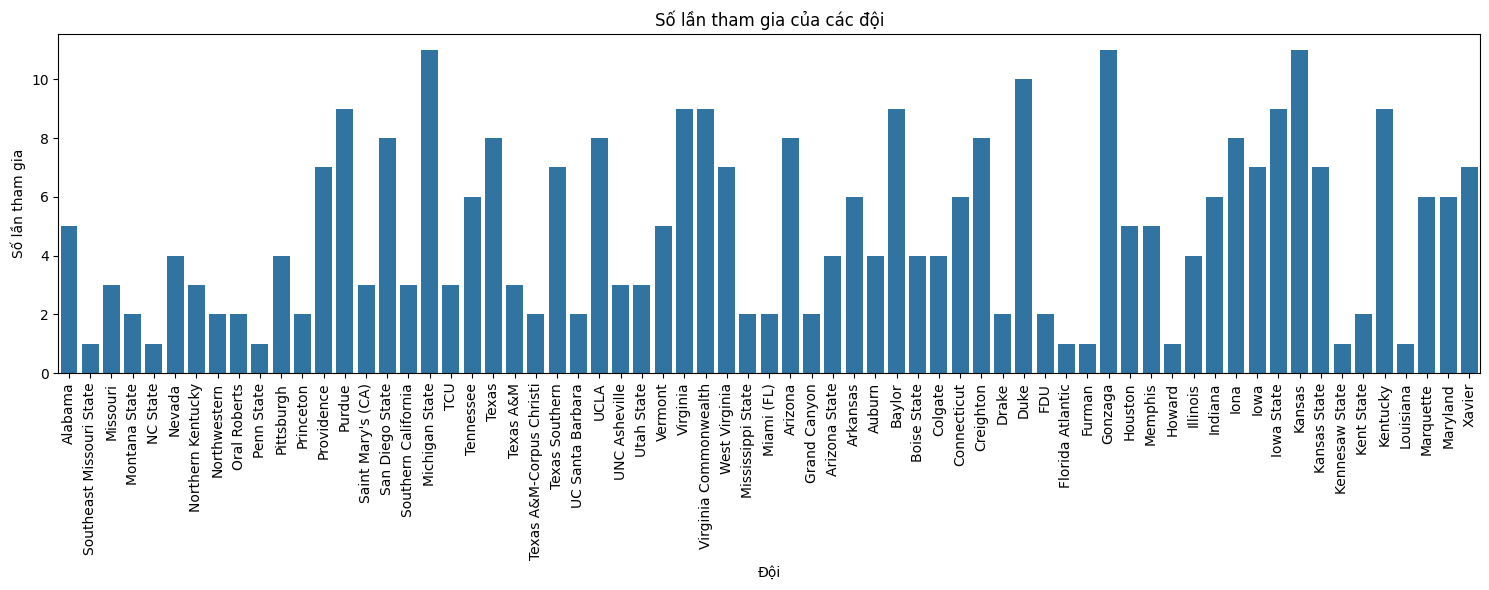

In [5]:
team_counts = pd.DataFrame()

for year in df['Year'].unique():
    # Lọc dữ liệu cho từng năm
    year_df = df[df['Year'] == year]
    # Đếm số lần tham gia của mỗi đội trong năm đó
    counts = year_df['Team'].value_counts()
    # Thêm vào DataFrame mới
    team_counts[year] = counts
    
# Tính tổng số lần tham gia của mỗi đội
team_counts['Total'] = team_counts.sum(axis=1)

# Tìm đội tham gia nhiều nhất
most_participated_teams = team_counts['Total'].idxmax()
max_participations = team_counts['Total'].max()

# Vẽ biểu đồ cột cho số lần tham gia của các đội
plt.figure(figsize=(15, 6))
sns.barplot(x=team_counts.index, y='Total', data=team_counts)
plt.xticks(rotation=90)
plt.xlabel('Đội')
plt.ylabel('Số lần tham gia')
plt.title('Số lần tham gia của các đội')
plt.tight_layout()
plt.show()

## biểu đồ cột cho top 10 đội có số trận thắng trung bình cao nhất

C:\Users\truon\AppData\Local\Temp\ipykernel_29272\877713202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='viridis')


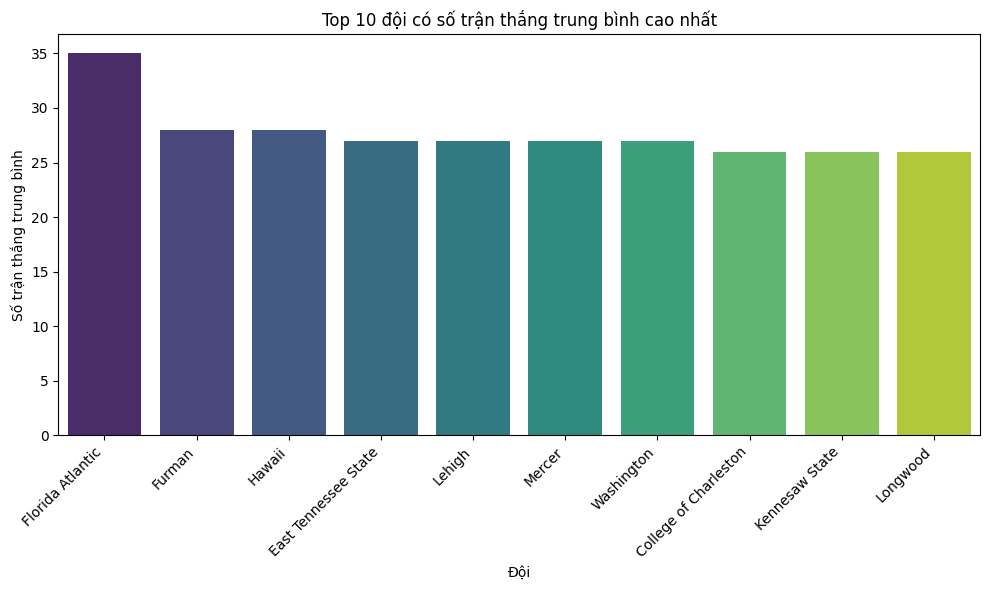

In [6]:
df['Winning Avg'] = df['W'] / df.groupby('Team')['Year'].transform('nunique')

# Lấy top 10 đội có số trận thắng trung bình cao nhất
top_10_teams = df.groupby('Team')['Winning Avg'].mean().nlargest(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Đội')
plt.ylabel('Số trận thắng trung bình')
plt.title('Top 10 đội có số trận thắng trung bình cao nhất')
plt.tight_layout()
plt.show()

## top 15 đội có chỉ số SRS trung bình cao nhất

C:\Users\truon\AppData\Local\Temp\ipykernel_29272\1267962114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_teams.index, y=top_15_teams.values, palette='mako')


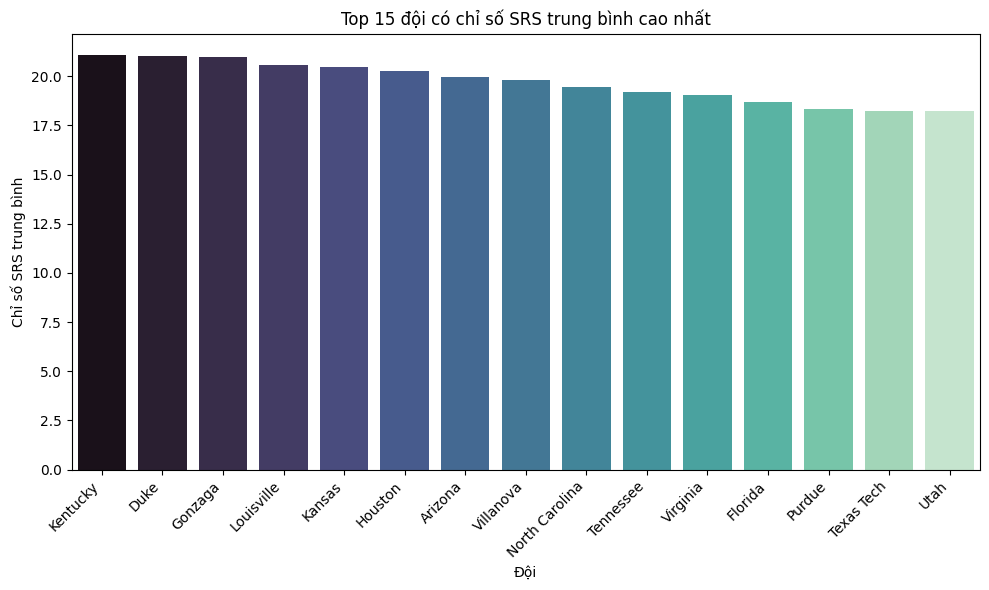

In [7]:
# Tính chỉ số SRS trung bình cho mỗi đội
df['SRS Avg'] = df.groupby('Team')['SRS'].transform('mean')

# Lấy top 15 đội có chỉ số SRS trung bình cao nhất
top_15_teams = df.groupby('Team')['SRS Avg'].mean().nlargest(15)

# Vẽ biểu đồ cột cho top 15 đội có chỉ số SRS trung bình cao nhất
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_teams.index, y=top_15_teams.values, palette='mako')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Đội')
plt.ylabel('Chỉ số SRS trung bình')
plt.title('Top 15 đội có chỉ số SRS trung bình cao nhất')
plt.tight_layout()
plt.show()

## biểu đồ facet cho số lượng đội cho mỗi seed trong mỗi khu vực

C:\Users\truon\AppData\Local\Temp\ipykernel_29272\889707952.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_teams = seed_counts.groupby('Seed').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
c:\Users\truon\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


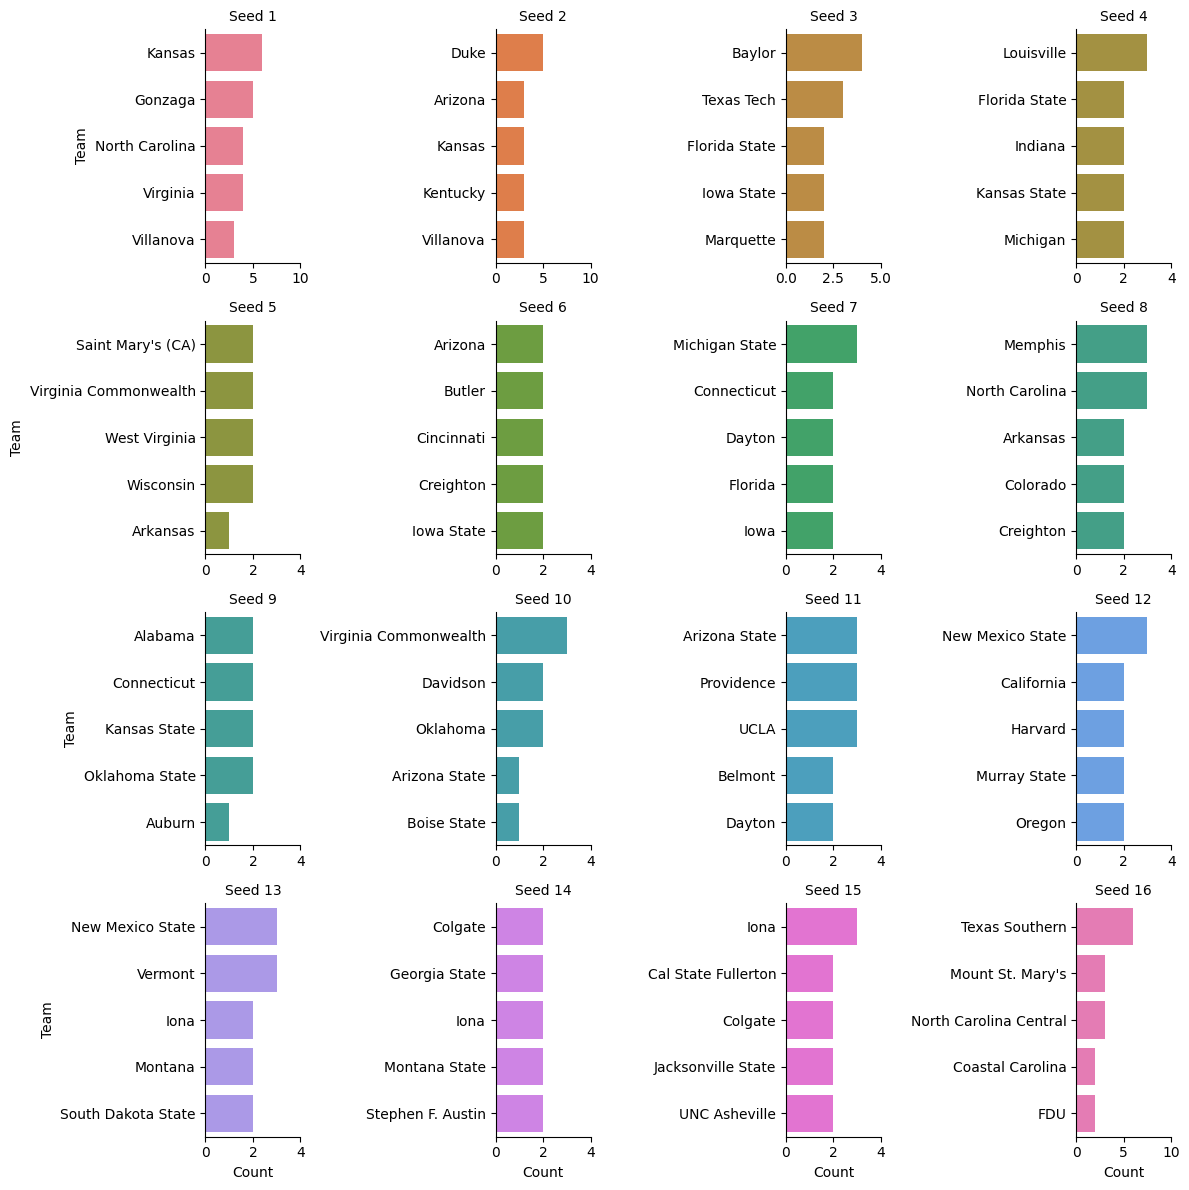

In [8]:
# Tính số lần mỗi đội xuất hiện trong từng hạt giống
seed_counts = df.groupby(['Seed', 'Team']).size().reset_index(name='Count')

# Chỉ lấy top 5 đội của mỗi seed
top_teams = seed_counts.groupby('Seed').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

g = sns.FacetGrid(top_teams, col='Seed', col_wrap=4, hue='Seed', palette='husl', sharex=False, sharey=False)
g.map(sns.barplot, 'Count', 'Team')
g.set_titles("Seed {col_name}")
g.set_xticklabels()
plt.tight_layout()
plt.show()

Biểu đồ tỉ lệ W-L% và Team Points của các đội thuộc TOP 10 (tham gia 2012-2023)

Team
Gonzaga                  0.872273
Kentucky                 0.796333
Virginia                 0.794667
Duke                     0.791500
Kansas                   0.790636
San Diego State          0.760000
Vermont                  0.758000
Virginia Commonwealth    0.746444
Memphis                  0.744000
Baylor                   0.732000
Name: W-L%, dtype: float64


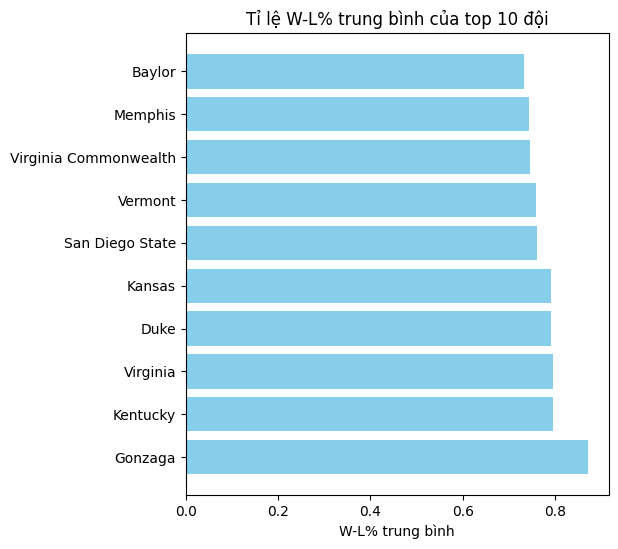

In [9]:
valid_teams = df.groupby('Team').filter(lambda x: (2012 in x['Year'].values) and (2023 in x['Year'].values))
# Tính tỉ lệ W-L% trung bình và Team Points trung bình cho mỗi đội trong top 10
average_WL = valid_teams.groupby('Team')['W-L%'].mean().nlargest(10)
print(average_WL)
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ tỉ lệ W-L%
plt.subplot(1, 2, 1)
plt.barh(average_WL.index, average_WL, color='skyblue')
plt.xlabel('W-L% trung bình')
plt.title('Tỉ lệ W-L% trung bình của top 10 đội')
plt.show()


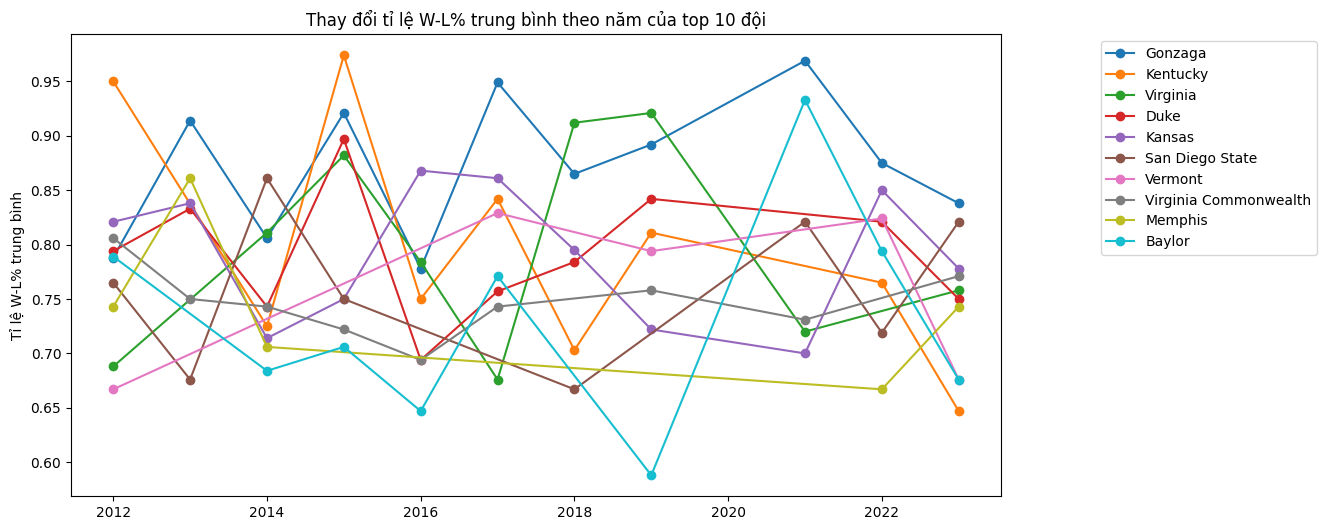

In [10]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ đường
for team in average_WL.index:
    years = valid_teams[valid_teams['Team'] == team]['Year']
    wl_percentages = valid_teams[valid_teams['Team'] == team]['W-L%']
    plt.plot(years, wl_percentages, marker='o', label=team)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.ylabel('Tỉ lệ W-L% trung bình')
plt.title('Thay đổi tỉ lệ W-L% trung bình theo năm của top 10 đội')

plt.show()

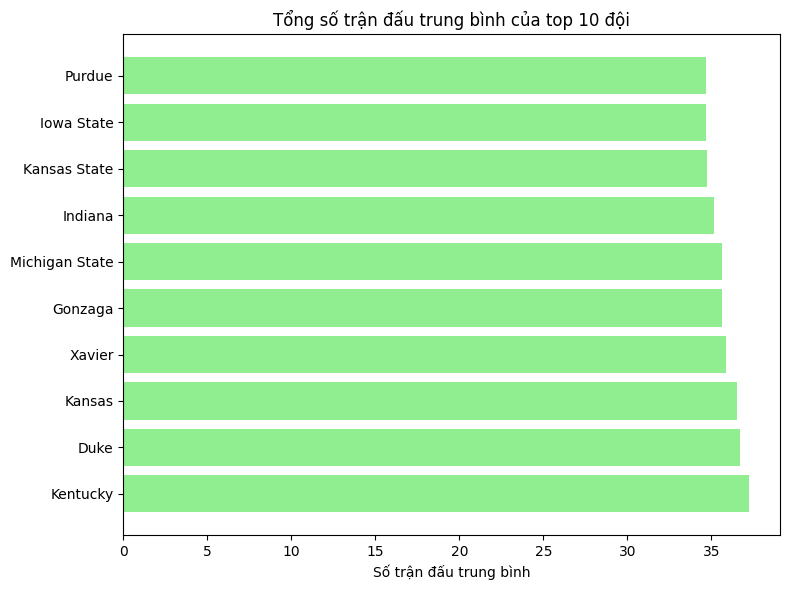

In [11]:
# Tính tổng số trận đấu (G) trung bình cho mỗi đội trong top 10
average_G = valid_teams.groupby('Team')['G'].mean().nlargest(10)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))

# Biểu đồ số trận đấu trung bình
plt.barh(average_G.index, average_G, color='lightgreen')
plt.xlabel('Số trận đấu trung bình')
plt.title('Tổng số trận đấu trung bình của top 10 đội')

plt.tight_layout()
plt.show()


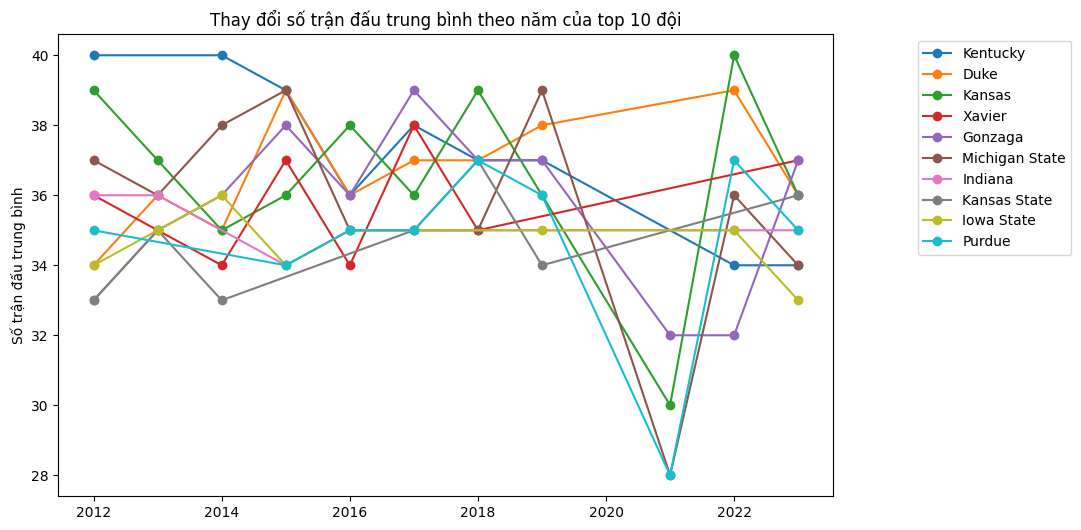

In [12]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ đường
for team in average_G.index:
    years = valid_teams[valid_teams['Team'] == team]['Year']
    total_games = valid_teams[valid_teams['Team'] == team]['G']  # Lấy cột 'G' (tổng số trận đấu)
    plt.plot(years, total_games, marker='o', label=team)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.ylabel('Số trận đấu trung bình')
plt.title('Thay đổi số trận đấu trung bình theo năm của top 10 đội')
plt.show()

Top 10 Home W

In [13]:

averageHomeW = valid_teams.groupby('Team')['Home W'].mean()
top_10_teamsHW = averageHomeW.nlargest(10)
print("Top 10 đội và HomeW trung bình:")
print(top_10_teamsHW)


Top 10 đội và HomeW trung bình:
Team
Kentucky           16.666667
Indiana            16.000000
Duke               15.200000
Memphis            15.200000
Kansas             15.090909
Marquette          15.000000
Gonzaga            14.636364
San Diego State    14.625000
Purdue             14.555556
Xavier             14.285714
Name: Home W, dtype: float64


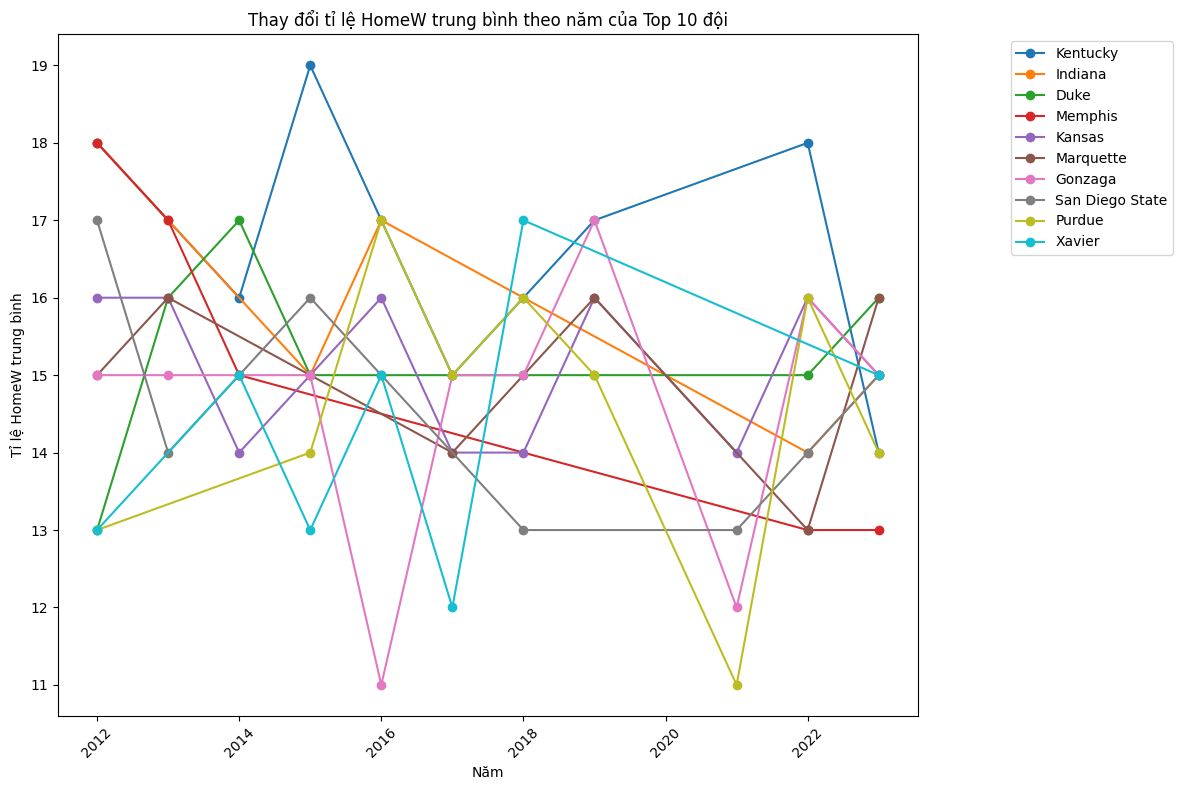

In [14]:
plt.figure(figsize=(12, 8))
for team in top_10_teamsHW.index:
    years = valid_teams[valid_teams['Team'] == team]['Year']
    home_wins = valid_teams[valid_teams['Team'] == team]['Home W']
    plt.plot(years, home_wins, marker='o', label=team)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ HomeW trung bình')
plt.title('Thay đổi tỉ lệ HomeW trung bình theo năm của Top 10 đội')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Home L

In [15]:

averageHomeW = valid_teams.groupby('Team')['Home L'].mean()
top_10_teams = averageHomeW.nlargest(10)
print("Top 10 đội và HomeL trung bình:")
print(top_10_teams)




Top 10 đội và HomeL trung bình:
Team
West Virginia     3.428571
Texas             3.250000
Baylor            2.888889
Connecticut       2.833333
Kansas State      2.571429
Iowa State        2.444444
Creighton         2.375000
Xavier            2.285714
Alabama           2.200000
Michigan State    2.181818
Name: Home L, dtype: float64


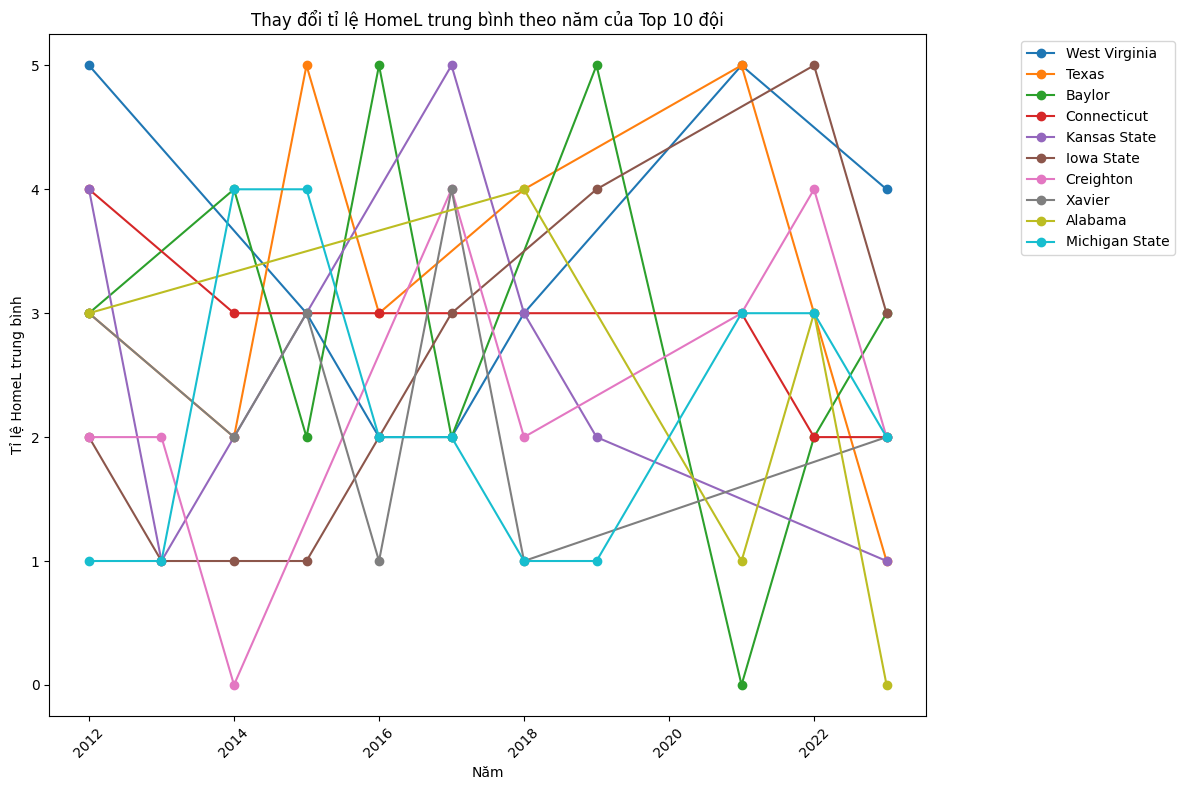

In [16]:
# Tạo biểu đồ đường
plt.figure(figsize=(12, 8))
for team in top_10_teams.index:
    years = valid_teams[valid_teams['Team'] == team]['Year']
    home_losses = valid_teams[valid_teams['Team'] == team]['Home L']
    plt.plot(years, home_losses, marker='o', label=team)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.xlabel('Năm')
plt.ylabel('Tỉ lệ HomeL trung bình')
plt.title('Thay đổi tỉ lệ HomeL trung bình theo năm của Top 10 đội')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 hạt giống số 1 (đội tham gia 2012-2023)

In [17]:

# Lọc ra dữ liệu cho các năm từ 2012 đến 2023 và hạt giống là 1
data_2012_to_2023_seed_1 = df[(df['Year'] >= 2012) & (df['Year'] <= 2023) & (df['Seed'] == 1)]

# Đếm số lần xuất hiện của mỗi đội
teams_count = data_2012_to_2023_seed_1['Team'].value_counts()

# Lấy top 10 đội có số lần xuất hiện nhiều nhất
top_10_teamsSeed = teams_count.nlargest(9)

print("Top 10 đội có hạt giống số 1 nhiều nhất từ năm 2012 đến 2023:")
print(top_10_teamsSeed)



Top 10 đội có hạt giống số 1 nhiều nhất từ năm 2012 đến 2023:
Team
Kansas            6
Gonzaga           5
Virginia          4
North Carolina    4
Villanova         3
Kentucky          2
Arizona           2
Baylor            2
Duke              2
Name: count, dtype: int64


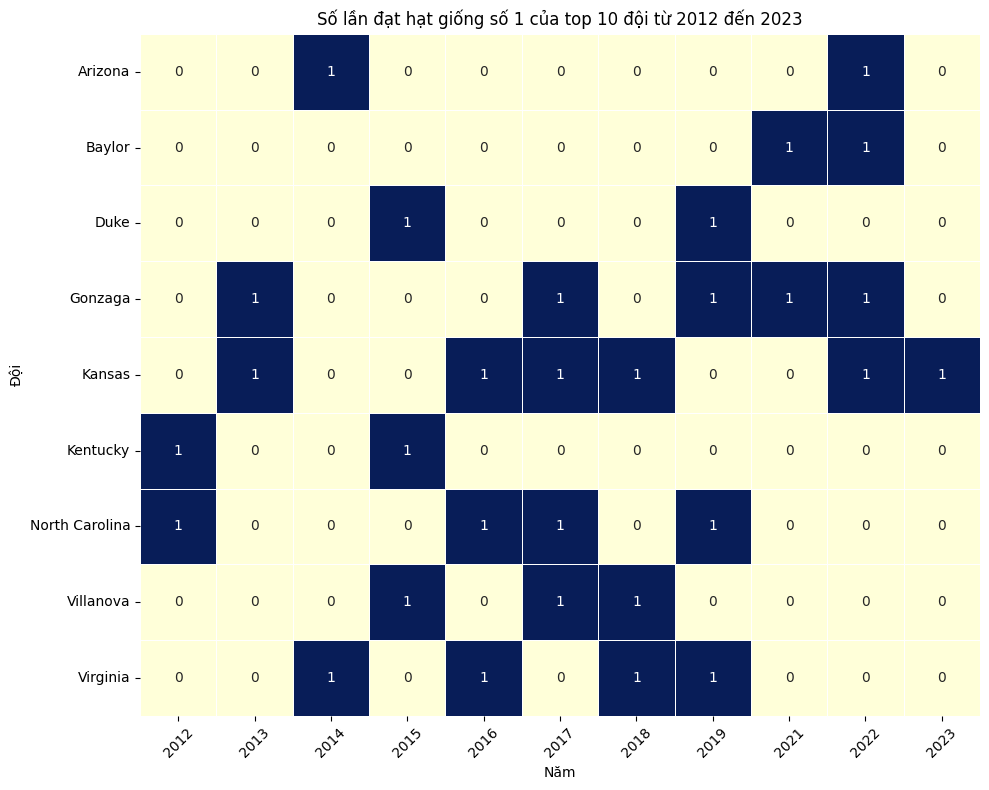

In [18]:

# Lọc dữ liệu của top 10 đội
top_10_teams_data = data_2012_to_2023_seed_1[data_2012_to_2023_seed_1['Team'].isin(top_10_teamsSeed.index)]

# Tạo bảng chuyển đổi
heatmap_data = top_10_teams_data.pivot_table(index='Team', columns='Year', aggfunc='size', fill_value=0)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5,cbar=False)
plt.title('Số lần đạt hạt giống số 1 của top 10 đội từ 2012 đến 2023')
plt.xlabel('Năm')
plt.ylabel('Đội')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 đội vào Round 16

In [19]:
# Đếm số lần mỗi đội vào được Made Round of 16 từ năm 2012 đến 2023
team_round16_counts = valid_teams.groupby('Team')['Made Round of 16'].sum()

# Lấy top 10 đội có số lần vào được Made Round of 16 nhiều nhất
top_10_teamsR16 = team_round16_counts.nlargest(10)

print("Top 10 đội vào được Made Round of 16 nhiều nhất từ năm 2012 đến 2023:")
print(top_10_teamsR16)

Top 10 đội vào được Made Round of 16 nhiều nhất từ năm 2012 đến 2023:
Team
Gonzaga           8
Duke              6
Kansas            6
Kentucky          6
Michigan State    6
Baylor            4
Purdue            4
Xavier            4
Indiana           3
Iowa State        3
Name: Made Round of 16, dtype: int64


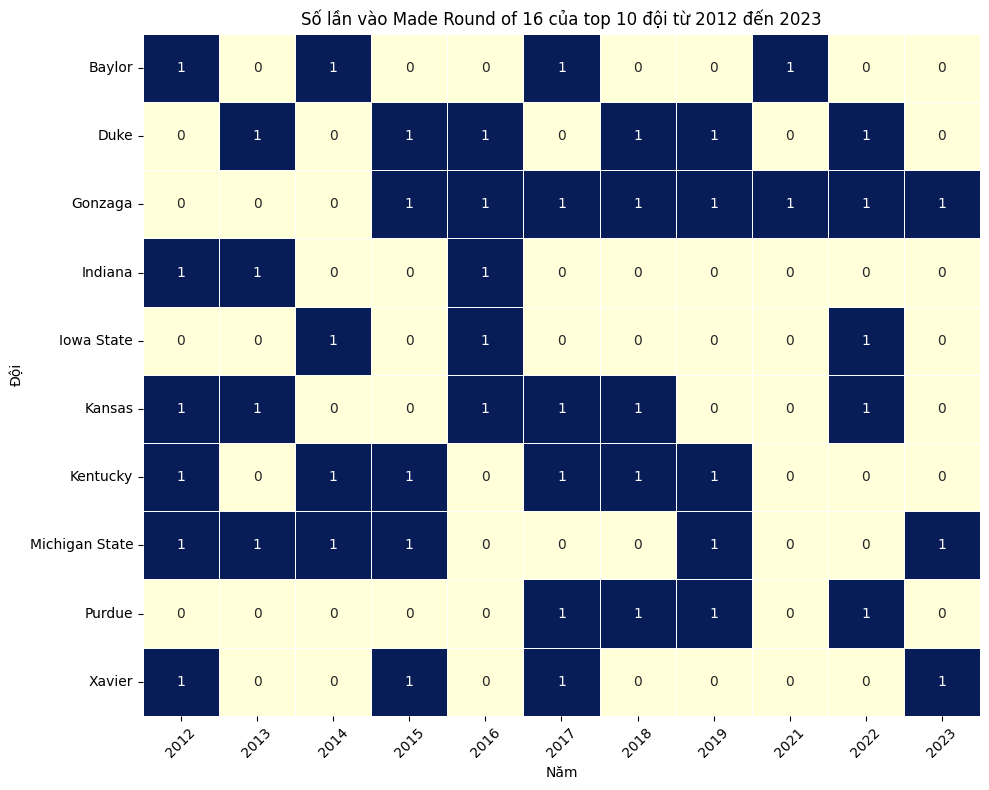

In [20]:

# Lọc dữ liệu của top 10 đội
top_10_teams_data = valid_teams[valid_teams['Team'].isin(top_10_teamsR16.index)]

# Tạo bảng chuyển đổi
heatmap_data = top_10_teams_data.pivot_table(index='Team', columns='Year', values='Made Round of 16', aggfunc='sum', fill_value=0)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5,cbar=False)
plt.title('Số lần vào Made Round of 16 của top 10 đội từ 2012 đến 2023')
plt.xlabel('Năm')
plt.ylabel('Đội')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Tính tổng số lần thắng và số lần thua trong hội nghị cho mỗi đội
conf_wins = valid_teams.groupby('Team')['Conf. W'].sum()
conf_losses = valid_teams.groupby('Team')['Conf. L'].sum()

# Top 10 đội có số lần thắng hội nghị cao nhất
top_10_winning_teams = conf_wins.nlargest(10)
print("Top 10 đội có số lần thắng cao nhất từ 2012 đến 2023:")
print(top_10_winning_teams)

# Top 10 đội có số lần thua hội nghị cao nhất
top_10_losing_teams = conf_losses.nlargest(10)
print("\nTop 10 đội có số lần thua cao nhất từ 2012 đến 2023:")
print(top_10_losing_teams)

Top 10 đội có số lần thắng cao nhất từ 2012 đến 2023:
Team
Gonzaga                  168
Kansas                   152
Michigan State           136
Duke                     134
Kentucky                 126
Virginia                 126
Purdue                   121
Virginia Commonwealth    120
Baylor                   102
San Diego State          102
Name: Conf. W, dtype: int64

Top 10 đội có số lần thua cao nhất từ 2012 đến 2023:
Team
Iowa State        69
Michigan State    69
Texas             63
Baylor            56
West Virginia     51
Kansas State      49
Creighton         48
Duke              48
Purdue            48
Kansas            46
Name: Conf. L, dtype: int64


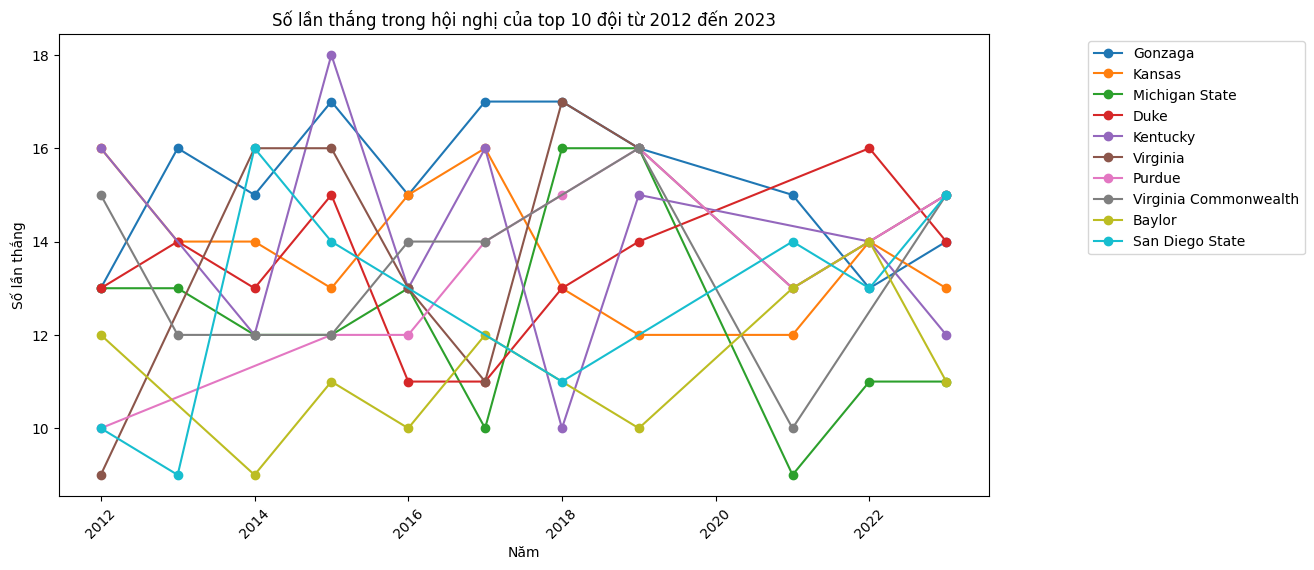

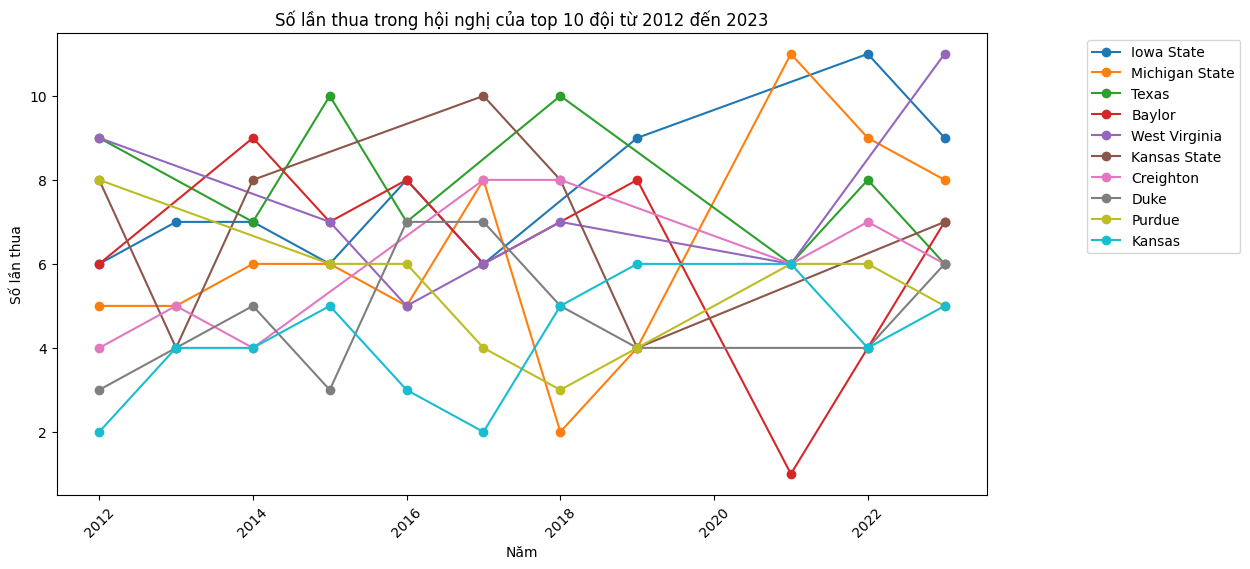

In [22]:
# Vẽ biểu đồ đường cho top 10 đội có số lần thắng cao nhất
plt.figure(figsize=(12, 6))
for team in top_10_winning_teams.index:
    years = valid_teams[valid_teams['Team'] == team]['Year']
    conf_wins = valid_teams[valid_teams['Team'] == team]['Conf. W']
    plt.plot(years, conf_wins, marker='o', label=team)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.title('Số lần thắng trong hội nghị của top 10 đội từ 2012 đến 2023')
plt.xlabel('Năm')
plt.ylabel('Số lần thắng')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ đường cho top 10 đội có số lần thua cao nhất
plt.figure(figsize=(12, 6))
for team in top_10_losing_teams.index:
    years = valid_teams[valid_teams['Team'] == team]['Year']
    conf_losses = valid_teams[valid_teams['Team'] == team]['Conf. L']
    plt.plot(years, conf_losses, marker='o', label=team)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.title('Số lần thua trong hội nghị của top 10 đội từ 2012 đến 2023')
plt.xlabel('Năm')
plt.ylabel('Số lần thua')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Tiền xử lý data

# Local Outlier Factor (LOF)
# Identify and handle potential outliers

# Select numerical columns for outlier analysis (chọn các cột dữ liệu số)
df_LOF = df.select_dtypes(include=['float64', 'int64'])

# Create Local Outlier Factor object (với số mẫu= 20 và Tỷ lệ ngoại lệ ước tính trong dữ liệu là 0.1)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to identify outliers
clf.fit_predict(df_LOF)

# Store outlier scores (Lưu trữ điểm ngoại lệ)
df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:706]

array([-2.49642525, -2.48883266, -2.45676295, -2.11509818, -2.10076208,
       -2.01976975, -2.01305165, -1.98621106, -1.97314913, -1.96951023,
       -1.89487989, -1.87237505, -1.83926472, -1.78899016, -1.78892637,
       -1.78870398, -1.78693626, -1.77376705, -1.73476473, -1.73157048,
       -1.69920952, -1.64428866, -1.60842928, -1.58349196, -1.57914337,
       -1.57570541, -1.52691894, -1.51975553, -1.49661358, -1.4952864 ,
       -1.49330688, -1.48744632, -1.48366107, -1.47656894, -1.4615749 ,
       -1.4551824 , -1.43972712, -1.42204363, -1.41437975, -1.40870603,
       -1.40695349, -1.39618893, -1.39429597, -1.39093688, -1.38831323,
       -1.37718154, -1.3700735 , -1.36855884, -1.36764697, -1.35499664,
       -1.35262032, -1.3507135 , -1.34749134, -1.33798357, -1.33024491,
       -1.32980708, -1.32818763, -1.32603214, -1.32589575, -1.31468517,
       -1.31181135, -1.30893645, -1.30791098, -1.30105495, -1.29908878,
       -1.28759377, -1.28537357, -1.27159283, -1.26834521, -1.26

In [24]:
# Identify outliers based on a threshold (tìm outlier dựa vào ngưỡng)
thresh_val = np.sort(df_scores)[15]
thresh_val

-1.7887039826707938

In [25]:
# Show outlier scores below the threshold
print(df_scores[df_scores < thresh_val])

[-1.78892637 -2.49642525 -2.11509818 -2.48883266 -1.97314913 -2.10076208
 -1.78899016 -1.98621106 -1.89487989 -2.45676295 -1.87237505 -2.01976975
 -2.01305165 -1.96951023 -1.83926472]


In [26]:
# Extract outliers (trích xuất các điểm ngoại lệ)
outliers = df_LOF[df_scores < thresh_val]
outliers

,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
141,2021,24,16,8,0.667,12.49,9.49,10,6,11,...,64.0,0.100,14.39,109.7,95.3,11.60,7,0,8.000000,14.825000
143,2021,16,14,2,0.875,13.66,-1.90,11,1,8,...,72.2,0.048,-5.80,99.6,105.4,-99.00,14,0,3.500000,4.517500
148,2021,20,12,8,0.600,-0.97,-3.92,4,5,3,...,63.9,0.007,-2.28,101.2,103.5,-5.75,16,0,12.000000,-0.970000
159,2021,18,12,6,0.667,-1.20,-6.42,6,3,4,...,67.7,0.030,-5.67,98.3,103.9,-0.54,15,0,1.500000,2.433750
170,2021,23,12,11,0.522,-5.67,-6.67,9,7,6,...,61.6,-0.004,-6.45,99.4,105.9,11.14,16,0,4.000000,-5.426667
185,2021,21,16,5,0.762,13.44,4.49,11,4,8,...,64.8,0.016,8.53,106.6,98.0,2.44,9,0,5.333333,10.186667
198,2021,22,15,7,0.682,12.59,6.50,9,4,10,...,65.7,0.043,9.69,107.9,98.2,0.63,10,0,3.000000,14.694000
218,2019,37,33,4,0.892,27.79,5.01,16,0,17,...,70.2,-0.001,4.46,106.9,102.5,1.87,1,1,3.000000,21.003636
322,2018,36,16,20,0.444,-7.53,-5.53,12,6,8,...,71.7,-0.010,-6.30,101.0,107.3,17.20,16,0,2.285714,-6.905714
326,2018,40,36,4,0.900,26.64,10.24,14,4,12,...,68.7,-0.018,11.31,111.3,100.0,3.98,1,1,4.000000,19.831111


In [27]:
# Pressure Imputation (Replacing outliers) (thay thế các điểm ngoại lệ)
pressure_val = df_LOF[df_scores == thresh_val]
print(pressure_val)
# Selects the columns containing categorical data (object type) from the original dataframe (chọn các cột chứa dữ liệu phân loại từ khung dữ liệu gốc)
df_objects = df.select_dtypes(include=['object'])

     Year   G   W   L   W-L%   SRS   SOS  Conf. W  Conf. L  Home W  ...  AdjT  \
703  2012  35  16  19  0.457 -2.66  0.51        7        9       8  ...  67.9   

      Luck  SOS AdjEM   OppO   OppD  NCSOS AdjEM  Seed  Made Round of 16  \
703  0.083        0.0  102.3  102.3         2.63    16                 0   

     Winning Avg  SRS Avg  
703          8.0   -1.645  

[1 rows x 35 columns]


In [28]:
# Converting DataFrame outliers to List of Dictionaries: 
res = outliers.to_records(index = False)

In [29]:
# Overwriting res with List from pressure_val (Potential Issue) (ghi đè res bằng danh sách từ pressure_val)
res[:] = pressure_val.to_records(index = False)

In [30]:
# Updating Rows in df_LOF Based on Condition and res (Cập nhật hàng trong df_LOF dựa trên điều kiện và res)
df_LOF[df_scores < thresh_val] = pd.DataFrame(res,df_LOF[df_scores < thresh_val].index)

df_LOF[df_scores < thresh_val]

,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,Home W,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
141,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
143,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
148,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
159,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
170,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
185,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
198,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
218,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
322,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645
326,2012,35,16,19,0.457,-2.66,0.51,7,9,8,...,67.9,0.083,0.0,102.3,102.3,2.63,16,0,8.0,-1.645


In [31]:
df = pd.concat([df_objects, df_LOF], axis = 1)
df.shape

(706, 36)

In [32]:
# Feature Preprocessing (Chọn các đặc trưng để huấn luyện mô hình)
X = df.iloc[:, 1:]  # Select all features except the first column (Team) -> X = df.drop(columns = ['Team'])

Y = df['Made Round of 16']
Y = np.array(Y).reshape(-1, 1)

print(X.shape)
print(Y.shape)

(706, 35)
(706, 1)


In [33]:
# Standardize features (centering and scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

(706, 35)


In [34]:
#  Train-Test Split
# Splits the features (X_down - potentially reduced dimensions) and target variable (Y) into training and testing sets for machine learning model evaluation. The training set size is set to 80% (train_size = 0.8).
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size = 0.8)

In [35]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# K-Nearest Neighbors Regressor (Logistic Regression)
kbr = KNeighborsRegressor()
kbr.fit(X_train, Y_train)
KNN_Regression_pred = kbr.predict(X_test)

MSE_KNN = mean_squared_error(Y_test, KNN_Regression_pred)
MAE_KNN = mean_absolute_error(Y_test, KNN_Regression_pred)

print("Mean Squared Error (MSE):", MSE_KNN)
print("Mean Absolute Error (MAE):", MAE_KNN)
# predictions on the test set and store them in predict.

# print(KNN_Regression_pred)

Mean Squared Error (MSE): 0.030140845070422535
Mean Absolute Error (MAE): 0.05492957746478873


In [ ]:
# K-Nearest Neighbors Classifier (binary classification)
kb = KNeighborsClassifier()
kb.fit(X_train, Y_train)
KNN_Classification_pred = kb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, KNN_Classification_pred))
print("F1-score:", f1_score(Y_test, KNN_Classification_pred))
# Since the target variable is binary ("Made Round of 16")

# print(KNN_Classification_pred)

Accuracy: 0.9507042253521126
F1-score: 0.8627450980392157


c:\Users\quanghung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# TensorFlow Neural Network (Classification)

# Build a deep neural network for classification
model = Sequential([
  # First hidden layer with 128 neurons and ReLU activation
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  # Dropout layer to prevent overfitting (randomly drop 50% of neurons during training)
  Dropout(0.5),
  # Second hidden layer with 64 neurons and ReLU activation
  Dense(64, activation='relu'),
  # Another Dropout layer for regularization
  Dropout(0.5),
  # Output layer with 1 neuron and sigmoid activation for binary classification (0 or 1)
  Dense(1, activation='sigmoid')
])

# Compile the neural network model
# - Optimizer (Dùng để chọn thuật toán training): Adam (efficient for various neural network architectures), RMSprop, SGD,...
# - Loss function: Binary cross-entropy (suitable for binary classification problems)
# - Metrics (Để đánh giá accuracy của models): Monitors accuracy during training - binary_accuracy, categorical_accuracy,...
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the neural network on the training data
# - Epochs: Number of times to iterate through the entire training data
# - Batch size: Number of samples processed before updating weights
# - Verbose: Controls how much training information is printed (2 for detailed info)
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

# Make predictions on the test data
NN_Classification_pred = model.predict(X_test)

# new_preds = preds
NN_Classification_pred[NN_Classification_pred >= 0.9] = 1
NN_Classification_pred[NN_Classification_pred < 0.9] = 0
# print(NN_Classification_pred)

# Evaluate the model's performance on the test data
# - Loss: How well the model minimizes the classification error
# - Accuracy: Percentage of correct predictions
loss, accuracy = model.evaluate(X_test, Y_test)


Epoch 1/20


c:\Users\quanghung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 1s - 51ms/step - accuracy: 0.6986 - loss: 0.5519
Epoch 2/20
18/18 - 0s - 2ms/step - accuracy: 0.8688 - loss: 0.3701
Epoch 3/20
18/18 - 0s - 2ms/step - accuracy: 0.9060 - loss: 0.2800
Epoch 4/20
18/18 - 0s - 2ms/step - accuracy: 0.9521 - loss: 0.1853
Epoch 5/20
18/18 - 0s - 2ms/step - accuracy: 0.9539 - loss: 0.1567
Epoch 6/20
18/18 - 0s - 3ms/step - accuracy: 0.9663 - loss: 0.1196
Epoch 7/20
18/18 - 0s - 3ms/step - accuracy: 0.9663 - loss: 0.0908
Epoch 8/20
18/18 - 0s - 2ms/step - accuracy: 0.9858 - loss: 0.0607
Epoch 9/20
18/18 - 0s - 3ms/step - accuracy: 0.9876 - loss: 0.0517
Epoch 10/20
18/18 - 0s - 2ms/step - accuracy: 0.9947 - loss: 0.0301
Epoch 11/20
18/18 - 0s - 2ms/step - accuracy: 0.9947 - loss: 0.0348
Epoch 12/20
18/18 - 0s - 2ms/step - accuracy: 0.9982 - loss: 0.0228
Epoch 13/20
18/18 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.0177
Epoch 14/20
18/18 - 0s - 3ms/step - accuracy: 0.9911 - loss: 0.0244
Epoch 15/20
18/18 - 0s - 2ms/step - accuracy: 0.9982 - loss: 0.0145

In [ ]:
print("F1-score (KNN classfication):", f1_score(Y_test, KNN_Classification_pred))
print("F1-score (NN classification):", f1_score(Y_test, NN_Classification_pred))

print("Accuracy_score (KNN classfication):", accuracy_score(Y_test, KNN_Classification_pred))
print("Accuracy_score (NN classification):", accuracy_score(Y_test, NN_Classification_pred))

F1-score (KNN classfication): 0.8627450980392157
F1-score (NN classification): 0.9629629629629629
Accuracy_score (KNN classfication): 0.9507042253521126
Accuracy_score (NN classification): 0.9859154929577465


In [ ]:
# TensorFlow Neural Network (Logistic Regression)

# Build a similar neural network architecture for regression (predicting continuous values)
model = Sequential([
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  # Output layer with 1 neuron (no activation for regression)
  Dense(1)
])

# Compile the model for regression
# - Optimizer: Adam
# - Loss function: Mean Absolute Error (MAE) (common metric for regression)
# - Metrics: Monitors MAE during training
model.compile(optimizer='adam',
              loss='mae',  # Changed to 'mae' for mean absolute error
              metrics=['mean_absolute_error'])

# Train the neural network for regression
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

# Make predictions on the test data
NN_Regression_pred = model.predict(X_test)

# Evaluate the model's performance on the test data (regression)
# - Loss: MAE between predicted and actual values
# - Mean Absolute Error: Another metric for evaluating regression models
loss, mean_absolute_error = model.evaluate(X_test, Y_test)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error(Y_test, NN_Regression_pred))

MAE_NN = mean_absolute_error
MSE_NN = mean_squared_error(Y_test, NN_Regression_pred)
# print(NN_Regression_pred)

Epoch 1/20


c:\Users\quanghung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 - 1s - 56ms/step - loss: 0.6898 - mean_absolute_error: 0.6898
Epoch 2/20
18/18 - 0s - 2ms/step - loss: 0.5512 - mean_absolute_error: 0.5512
Epoch 3/20
18/18 - 0s - 2ms/step - loss: 0.4634 - mean_absolute_error: 0.4634
Epoch 4/20
18/18 - 0s - 3ms/step - loss: 0.3980 - mean_absolute_error: 0.3980
Epoch 5/20
18/18 - 0s - 2ms/step - loss: 0.3317 - mean_absolute_error: 0.3317
Epoch 6/20
18/18 - 0s - 3ms/step - loss: 0.3100 - mean_absolute_error: 0.3100
Epoch 7/20
18/18 - 0s - 3ms/step - loss: 0.2610 - mean_absolute_error: 0.2610
Epoch 8/20
18/18 - 0s - 3ms/step - loss: 0.2468 - mean_absolute_error: 0.2468
Epoch 9/20
18/18 - 0s - 5ms/step - loss: 0.2144 - mean_absolute_error: 0.2144
Epoch 10/20
18/18 - 0s - 2ms/step - loss: 0.2143 - mean_absolute_error: 0.2143
Epoch 11/20
18/18 - 0s - 3ms/step - loss: 0.2023 - mean_absolute_error: 0.2023
Epoch 12/20
18/18 - 0s - 3ms/step - loss: 0.1912 - mean_absolute_error: 0.1912
Epoch 13/20
18/18 - 0s - 3ms/step - loss: 0.1708 - mean_absolute_error:

In [ ]:
print("Mean Squared Error KNN (MSE):", MSE_KNN)
print("Mean Absolute Error KNN (MAE):", MAE_KNN)
print('\n')
print("Mean Absolute Error NN:", MSE_NN)
print("Mean Squared Error NN:", MAE_NN)

Mean Squared Error KNN (MSE): 0.030140845070422535
Mean Absolute Error KNN (MAE): 0.05492957746478873


Mean Absolute Error NN: 0.028925735584685027
Mean Squared Error NN: 0.06509464234113693


In [ ]:
df.head(20)

,Team,Year,G,W,L,W-L%,SRS,SOS,Conf. W,Conf. L,...,AdjT,Luck,SOS AdjEM,OppO,OppD,NCSOS AdjEM,Seed,Made Round of 16,Winning Avg,SRS Avg
0,Alabama,2023,37,31,6,0.838,23.19,9.65,16,2,...,72.6,0.057,11.07,110.2,99.2,10.46,1,1,6.200000,16.698000
1,Arizona,2023,35,28,7,0.800,19.08,8.34,14,6,...,72.0,0.027,8.32,107.5,99.2,3.12,2,0,3.500000,19.942500
2,Arizona State,2023,36,23,13,0.639,11.29,8.18,11,9,...,68.1,0.047,8.40,108.4,100.0,0.78,11,0,5.750000,12.315000
3,Arkansas,2023,36,22,14,0.611,15.99,9.87,8,10,...,69.6,-0.042,10.29,109.7,99.4,3.24,8,1,3.666667,15.488333
4,Auburn,2023,34,21,13,0.618,14.35,9.29,10,8,...,67.6,-0.018,9.68,109.4,99.7,3.38,9,0,5.250000,17.590000
5,Baylor,2023,34,23,11,0.676,17.30,10.54,11,7,...,66.5,0.021,12.33,110.4,98.0,1.31,3,0,2.555556,18.145556
6,Boise State,2023,34,24,10,0.706,12.78,6.21,13,5,...,66.2,0.006,6.85,108.7,101.8,0.93,10,0,6.000000,11.025000
7,Colgate,2023,35,26,9,0.743,2.20,-5.86,17,1,...,67.5,0.015,-6.95,100.9,107.8,-1.23,15,0,6.500000,4.517500
8,Connecticut,2023,39,31,8,0.795,22.95,8.51,13,7,...,66.6,-0.056,10.39,109.7,99.3,-1.75,4,1,5.166667,16.751667
9,Creighton,2023,37,24,13,0.649,17.83,9.80,14,6,...,67.8,-0.068,11.15,111.0,99.8,5.97,6,1,3.000000,15.806250
